In [11]:
import pandas

df = pandas.read_csv('../data/KOIN.csv', index_col="token_id")

df.head()

,Background,Fur,Fur Pattern,Clothing,Expression,Beard,Eye,Headgear,trait_count
token_id,,,,,,,,,
5532,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,1.056485
4901,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,1.056485
3983,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,1.056485
3815,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,1.056485
3073,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,5555.0,1.056485


(5555, 2)

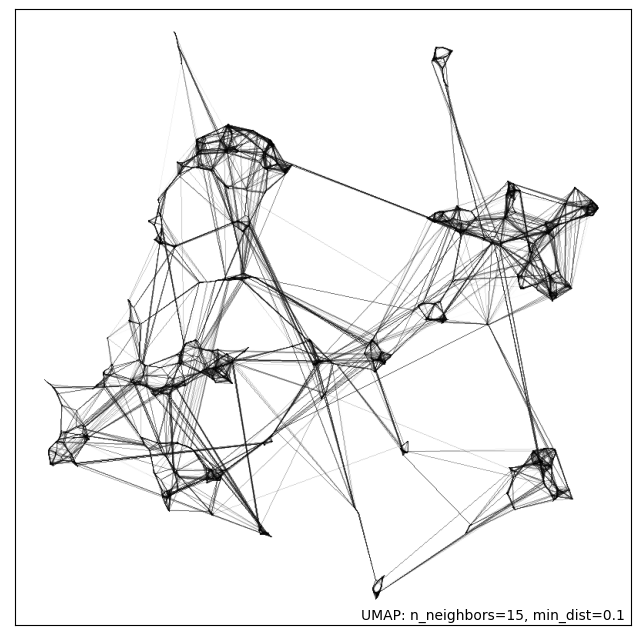

In [12]:
import umap.plot
from sklearn.preprocessing import StandardScaler

# Create a UMAP object and fit it to the data
reducer = umap.UMAP().fit(df)
umap.plot.connectivity(reducer)

# Use the UMAP object to transform the data into a low-dimensional space
low_dimensional_data = reducer.transform(df)
low_dimensional_data.shape

In [13]:
# reducer = umap.UMAP()
# scaled_data = StandardScaler().fit_transform(df)

# embedding = reducer.fit_transform(scaled_data)
# embedding.shape

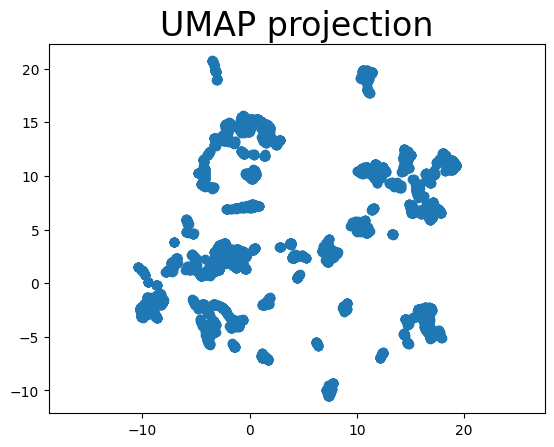

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection', fontsize=24);

plt.scatter(
    low_dimensional_data[:, 0],
    low_dimensional_data[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

Text(0.5, 1.0, 'DBSCAN')

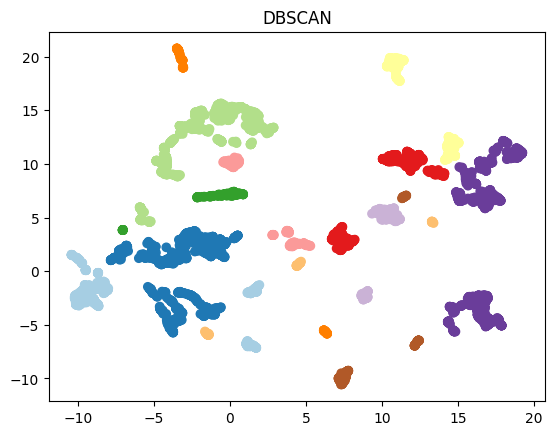

In [15]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=1, min_samples=5)
clusters = clusterer.fit_predict(low_dimensional_data)

plt.scatter(low_dimensional_data[:,0], low_dimensional_data[:,1],c=clusters, cmap='Paired')
plt.title("DBSCAN")